In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from hydrophone_data_processing import load

<AxesSubplot:>

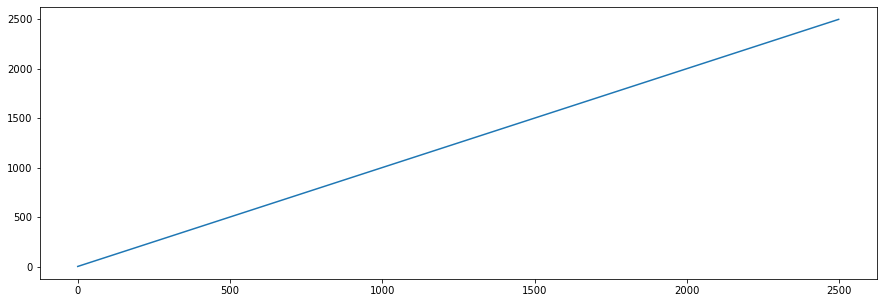

In [6]:
# import bubbles
bubbles = load.import_bubble_detections('/media/sda/data/borehole/detections/*.csv')
bubbles.reset_index(inplace=True)
bubbles.ones.cumsum().plot(figsize=(15, 5))
# bubbles[bubbles.similarity>0.6].ones.cumsum().plot(figsize=(15, 5))

In [8]:
bubbles = bubbles[bubbles.time<'2020-01-05']

In [10]:
def minnaert_radius(freq, depth):
    # https://www.engineeringtoolbox.com/specific-heat-capacity-gases-d_159.html
    gamma = 1.405 # taken from website above for 300K
    rho = 997 # kg/m^3
    PA = (rho * 9.8 * depth) + 100000 # kg/(m*s^2)
    # PA/rho => PA(kg*m^-1*s^-2) / rho(kg * m^-3) =? PA(...) * rho(kg^-1 * m^3) => m^2 * s^-2
    return (2 * np.pi * freq)**(-1) * ((3 * gamma * PA)/(rho))**(1/2)

In [25]:
bubbles['min_radius'] = minnaert_radius(freq=250, depth=15)
bubbles['max_radius'] = minnaert_radius(freq=200, depth=15)
bubbles['mean_radius'] = np.mean([minnaert_radius(freq=200, depth=15), minnaert_radius(freq=250, depth=15)])

volume = lambda r: (4/3)*np.pi*r**3
bubbles['volume_min'] = bubbles.min_radius.apply(volume)
bubbles['volume_max'] = bubbles.max_radius.apply(volume)
bubbles['volume_mean'] = bubbles.mean_radius.apply(volume)

def ideal_gas_n(pressure, volume):
    P = pressure
    V = volume
    R = 8.31446261815324 # J K^−1 mol^−1
    T = 34.75 + 273.15 # K
    n = (P * V)/(R * T)
    return n


def get_mass(pressure, volume):
    n = ideal_gas_n(pressure, volume)
    avogadros_n = 6.0221409e23
    h2_mass = 1.6735575e-27
    return n * avogadros_n * h2_mass

bubbles['mass_min'] = bubbles.volume_min.apply(lambda v: get_mass(pressure=(997 * 9.8 * 15) + 100000, volume=v))
bubbles['mass_max'] = bubbles.volume_max.apply(lambda v: get_mass(pressure=(997 * 9.8 * 15) + 100000, volume=v))
bubbles['mass_mean'] = bubbles.volume_mean.apply(lambda v: get_mass(pressure=(997 * 9.8 * 15) + 100000, volume=v))

/tmp/ipykernel_23773/2831204333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bubbles['min_radius'] = minnaert_radius(freq=250, depth=15)
/tmp/ipykernel_23773/2831204333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bubbles['max_radius'] = minnaert_radius(freq=200, depth=15)
/tmp/ipykernel_23773/2831204333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [24]:
# ideal_gas_n(pressure=(997*9.81*15)+100000
#             , volume=bubbles.volume_min[0]) * 6.022e23 * 1.6735575e-27

3.5325280213872181e-06

In [27]:
bubbles.set_index('time', inplace=True)

<AxesSubplot:xlabel='time'>

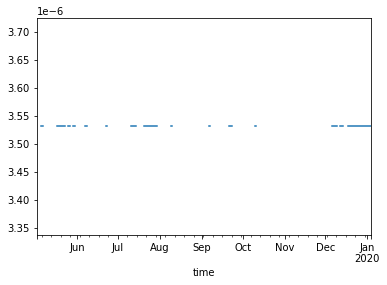

In [34]:
bubbles.resample('D').mean().mass_min.plot()

In [40]:
bubbles

,similarity,template_id,ones,min_radius,max_radius,mean_radius,volume_min,volume_max,volume_mean,mass_min,mass_max,mass_mean
time,,,,,,,,,,,,
2019-05-02 08:34:05.219999+00:00,0.879116,0,1,0.020554,0.025692,0.023123,0.000036,0.000071,0.000052,0.000004,0.000007,0.000005
2019-05-02 08:34:56.173999+00:00,0.850827,0,1,0.020554,0.025692,0.023123,0.000036,0.000071,0.000052,0.000004,0.000007,0.000005
2019-05-02 10:27:54.056999+00:00,0.860519,0,1,0.020554,0.025692,0.023123,0.000036,0.000071,0.000052,0.000004,0.000007,0.000005
2019-05-02 12:08:43.894999+00:00,0.906010,0,1,0.020554,0.025692,0.023123,0.000036,0.000071,0.000052,0.000004,0.000007,0.000005
2019-05-02 12:09:15.602999+00:00,0.814478,0,1,0.020554,0.025692,0.023123,0.000036,0.000071,0.000052,0.000004,0.000007,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-03 18:29:23.570000+00:00,0.822584,0,1,0.020554,0.025692,0.023123,0.000036,0.000071,0.000052,0.000004,0.000007,0.000005
2020-01-03 22:32:33.584000+00:00,0.835991,0,1,0.020554,0.025692,0.023123,0.000036,0.000071,0.000052,0.000004,0.000007,0.000005
2020-01-04 01:17:46.247000+00:00,0.835233,0,1,0.020554,0.025692,0.023123,0.000036,0.000071,0.000052,0.000004,0.000007,0.000005


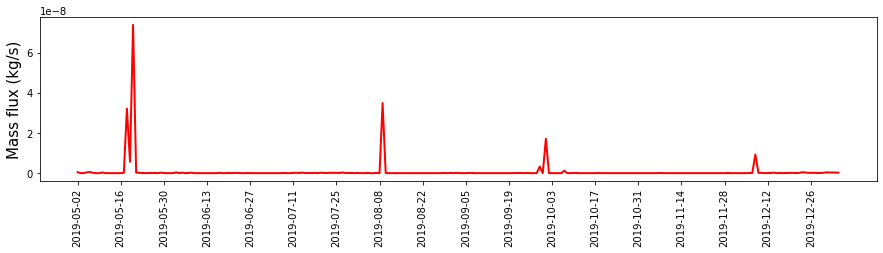

In [69]:
fig, ax = plt.subplots(figsize=(15, 3))
max_mass = bubbles.reset_index().groupby(pd.Grouper(key='time', freq='D')).sum().mass_max
max_mass = max_mass/86400 # convert to kg/s
x = max_mass.index
y = max_mass.values

ax.plot(x, y, color='red', linewidth=2)
ax.set_ylabel('Mass flux (kg/s)', fontsize=15)
ax.set_xticks(x[::14])
ax.set_xticklabels([str(d).split(' ')[0] for d in x[::14]], rotation=90)
fig.savefig('figures/fig2bottom.pdf', bbox_inches='tight')

In [53]:
max_mass/86400

time
2019-05-02 00:00:00+00:00    4.788505e-10
2019-05-03 00:00:00+00:00    0.000000e+00
2019-05-04 00:00:00+00:00    0.000000e+00
2019-05-05 00:00:00+00:00    3.990421e-10
2019-05-06 00:00:00+00:00    5.586590e-10
                                 ...     
2019-12-31 00:00:00+00:00    3.990421e-10
2020-01-01 00:00:00+00:00    3.192337e-10
2020-01-02 00:00:00+00:00    3.192337e-10
2020-01-03 00:00:00+00:00    3.192337e-10
2020-01-04 00:00:00+00:00    2.394253e-10
Freq: D, Name: mass_max, Length: 248, dtype: float64

In [52]:
60*60*24

86400